## 0. Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import datetime

In [2]:
df_emo_full = pd.read_csv(r'/Users/harrisonchaseweber/Desktop/Springboard/Billboard Top 10 Prediction/DataFiles/df_emo_full.csv', index_col = 0)

In [3]:
# What is the shape of our data?
df_emo_full.shape

(327895, 36)

In [4]:
df_emo_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327895 entries, 0 to 327360
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   WeekID                   327895 non-null  object 
 1   Week Position            327895 non-null  int64  
 2   Song                     327895 non-null  object 
 3   SongID                   327895 non-null  object 
 4   Instance                 327895 non-null  int64  
 5   Previous Week Position   327895 non-null  float64
 6   Peak Position            327895 non-null  int64  
 7   Weeks on Chart           327895 non-null  int64  
 8   Artist                   269355 non-null  object 
 9   wordCount                327895 non-null  float64
 10  languages                269355 non-null  object 
 11  allWordCount             327895 non-null  float64
 12  year                     327895 non-null  float64
 13  decade                   327895 non-null  object 
 14  MTLD

## 1. Explore the Data

### 1a. Counts of categorical data

In [5]:
# Which unique songs appeared most on the charts?
df_emo_full.groupby(['SongID', 'Artist'])['PrimaryKey'].count().sort_values(ascending = False).head()

SongID                      Artist         
RadioactiveImagine Dragons  imagine dragons    87
SailAWOLNATION              awolnation         79
Blinding LightsThe Weeknd   the weeknd         76
I'm YoursJason Mraz         jason mraz         76
How Do I LiveLeAnn Rimes    leann rimes        69
Name: PrimaryKey, dtype: int64

In [6]:
# Which Performers have the highest success indicator?
df_emo_full.groupby(['Artist'])['SuccessInd'].sum().sort_values(ascending = False).head(10)

Artist
mariah carey     254
rihanna          228
madonna          201
usher            193
janet jackson    186
the beatles      180
maroon 5         180
katy perry       152
stevie wonder    151
bruno mars       150
Name: SuccessInd, dtype: int64

In [7]:
# Which SongIDs have the lowest (best) average Week Position?
df_emo_full.groupby(['SongID'])['Week Position'].mean().sort_values(ascending = True).head(10)

SongID
Good 4 UOlivia Rodrigo                                         1.000000
my.lifeJ. Cole, 21 Savage & Morray                             2.000000
Leave The Door OpenSilk Sonic (Bruno Mars & Anderson .Paak)    2.454545
PeachesJustin Bieber Featuring Daniel Caesar & Giveon          3.111111
amariJ. Cole                                                   5.000000
RapstarPolo G                                                  5.666667
Drivers LicenseOlivia Rodrigo                                  5.947368
Montero (Call Me By Your Name)Lil Nas X                        6.625000
Get BackThe Beatles With Billy Preston                         6.833333
Kiss Me MoreDoja Cat Featuring SZA                             6.833333
Name: Week Position, dtype: float64

In [8]:
# Which Artists have the lowest (best) average Peak Position?
df_emo_full.groupby(['Artist'])['Peak Position'].mean().sort_values(ascending = True).head(10)

Artist
baauer                         1.000000
the scotts                     1.000000
ariana grande justin bieber    1.000000
6ix9ine nicki minaj            1.000000
brandy monica                  1.814815
artists for haiti              2.000000
cardi b bad bunny j balvin     2.176471
post malone swae lee           2.320755
usa for africa                 2.388889
the elegants                   2.823529
Name: Peak Position, dtype: float64

In [9]:
# Which Performers have the highest average Weeks on Chart?
df_emo_full.groupby(['Artist'])['Weeks on Chart'].mean().sort_values(ascending = False).head(10)

Artist
awolnation                               40.000000
 benny blanco halsey khalid              38.000000
gabby barrett                            31.500000
gotye                                    29.516667
duncan sheik                             28.000000
lewis capaldi                            27.009434
post malone swae lee                     27.000000
bastille                                 26.518519
james arthur                             26.500000
charlie puth wiz khalifa dlj the real    26.500000
Name: Weeks on Chart, dtype: float64

In [10]:
# What is the count of languages?
df_emo_full['languages'].value_counts()

en    269355
Name: languages, dtype: int64

In [11]:
# What is the value count of instance?
# Recall, Instance is the number of times a song enters the billboard 100 list after not being listed the week prior
df_emo_full['Instance'].value_counts()

1     308600
2      16192
3       2397
4        371
5        185
6         68
8         24
9         24
7         20
10        14
Name: Instance, dtype: int64

### 1b. Distributions of numeric data

0.0       1.0
0.1      81.0
0.2      96.0
0.3     113.0
0.4     126.0
0.5     142.0
0.6     166.0
0.7     188.0
0.8     216.0
0.9     304.0
1.0    1363.0
Name: allWordCount, dtype: float64


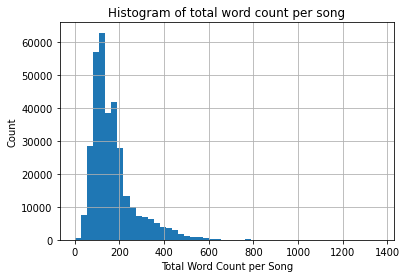

In [12]:
# Distribution of total word count
print(df_emo_full['allWordCount'].quantile(np.arange(0, 1.1, .1)))
df_emo_full['allWordCount'].hist(bins = 50)
plt.xlabel("Total Word Count per Song")
plt.ylabel("Count")
plt.title("Histogram of total word count per song")
plt.show()

0.0      1.0
0.1     37.0
0.2     44.0
0.3     50.0
0.4     54.0
0.5     60.0
0.6     67.0
0.7     76.0
0.8     85.0
0.9    122.0
1.0    395.0
Name: wordCount, dtype: float64


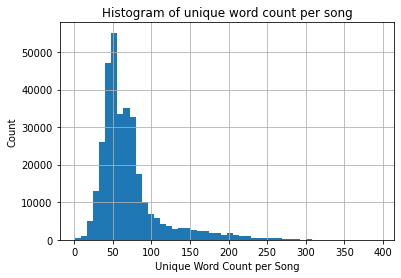

In [13]:
# Distribution of unique word count
print(df_emo_full['wordCount'].quantile(np.arange(0, 1.1, .1)))
df_emo_full['wordCount'].hist(bins = 50)
plt.xlabel("Unique Word Count per Song")
plt.ylabel("Count")
plt.title("Histogram of unique word count per song")
plt.show()

0.0     1.0
0.1     2.0
0.2     3.0
0.3     4.0
0.4     6.0
0.5     7.0
0.6     9.0
0.7    11.0
0.8    14.0
0.9    19.0
1.0    87.0
Name: Weeks on Chart, dtype: float64


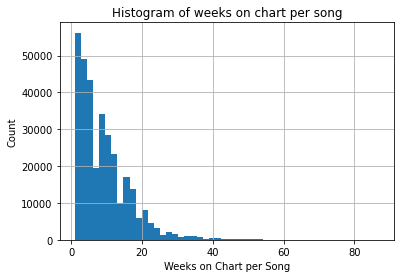

In [14]:
# Distribution of weeks on chart
print(df_emo_full['Weeks on Chart'].quantile(np.arange(0, 1.1, .1)))
df_emo_full['Weeks on Chart'].hist(bins = 50)
plt.xlabel("Weeks on Chart per Song")
plt.ylabel("Count")
plt.title("Histogram of weeks on chart per song")
plt.show()

0.0      1.0
0.1     10.0
0.2     19.0
0.3     28.0
0.4     37.0
0.5     47.0
0.6     57.0
0.7     67.0
0.8     76.0
0.9     87.0
1.0    100.0
Name: Previous Week Position, dtype: float64


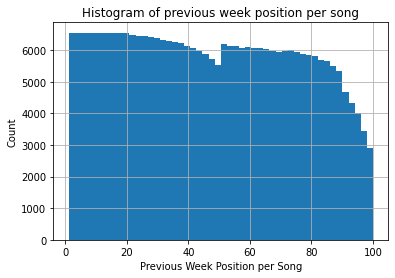

In [15]:
# Distribution of previous week position
print(df_emo_full[df_emo_full['Previous Week Position'] <= 100]['Previous Week Position'].quantile(np.arange(0, 1.1, .1)))
df_emo_full[df_emo_full['Previous Week Position'] <= 100]['Previous Week Position'].hist(bins = 50)
plt.xlabel("Previous Week Position per Song")
plt.ylabel("Count")
plt.title("Histogram of previous week position per song")
plt.show()

0.0      1.0
0.1      4.0
0.2     10.0
0.3     18.0
0.4     28.0
0.5     39.0
0.6     50.0
0.7     60.0
0.8     72.0
0.9     85.0
1.0    100.0
Name: Peak Position, dtype: float64


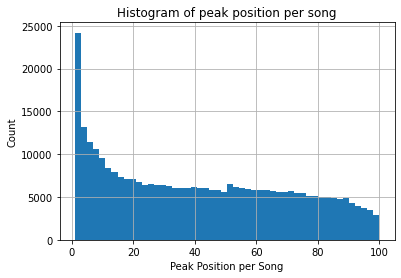

In [16]:
# Distribution of peak position
print(df_emo_full['Peak Position'].quantile(np.arange(0, 1.1, .1)))
df_emo_full['Peak Position'].hist(bins = 50)
plt.xlabel("Peak Position per Song")
plt.ylabel("Count")
plt.title("Histogram of peak position per song")
plt.show()

### 1c. Boxplots of Emotion Scores

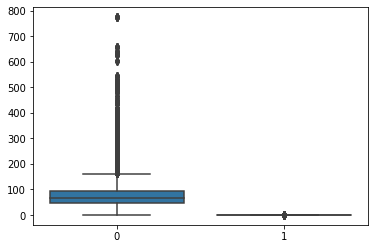

In [17]:
sns.boxplot([df_emo_full['emoWordCount'], df_emo_full['SuccessInd']])
plt.show()

In [18]:
print(df_emo_full.groupby(['SuccessInd'])['emoWordCount'].describe())

               count       mean        std  min   25%   50%    75%    max
SuccessInd                                                               
0           295105.0  76.886190  49.236550  0.0  45.0  64.0   92.0  774.0
1            32790.0  82.353309  49.995541  0.0  47.0  73.0  102.0  522.0


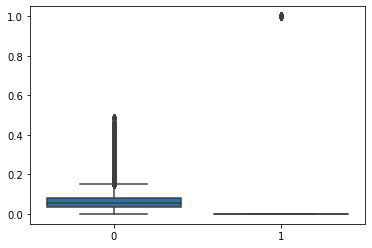

In [19]:
sns.boxplot([df_emo_full['joy_normalized'], df_emo_full['SuccessInd']])
plt.show()

In [20]:
print(df_emo_full.groupby(['SuccessInd'])['joy_normalized'].describe())

               count      mean       std  min       25%       50%       75%  \
SuccessInd                                                                    
0           295105.0  0.065078  0.045720  0.0  0.034303  0.056589  0.081257   
1            32790.0  0.065210  0.047103  0.0  0.034263  0.055325  0.083015   

                 max  
SuccessInd            
0           0.483700  
1           0.438609  


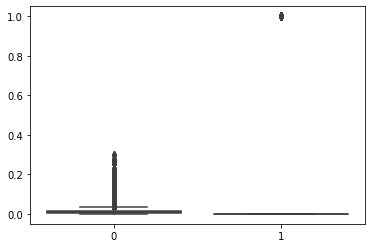

In [21]:
sns.boxplot([df_emo_full['anger_normalized'], df_emo_full['SuccessInd']])
plt.show()

In [22]:
print(df_emo_full.groupby(['SuccessInd'])['anger_normalized'].describe())

               count      mean       std  min       25%       50%       75%  \
SuccessInd                                                                    
0           295105.0  0.013451  0.016525  0.0  0.004442  0.008582  0.017151   
1            32790.0  0.013474  0.017238  0.0  0.003850  0.008748  0.016650   

                 max  
SuccessInd            
0           0.298526  
1           0.271010  


## 2. Additional Variable Creation

### 2a. Artist Count

In [23]:
df_emo_full.dtypes

WeekID                      object
Week Position                int64
Song                        object
SongID                      object
Instance                     int64
Previous Week Position     float64
Peak Position                int64
Weeks on Chart               int64
Artist                      object
wordCount                  float64
languages                   object
allWordCount               float64
year                       float64
decade                      object
MTLD                       float64
TTR                        float64
CTTR                       float64
sentimentScore             float64
sentimentScore_pos         float64
sentimentScore_neg         float64
emoWordCount               float64
joy_normalized             float64
sadness_normalized         float64
anger_normalized           float64
disgust_normalized         float64
trust_normalized           float64
anticipation_normalized    float64
fear_normalized            float64
surprise_normalized 

In [24]:
# Change WeekID into date object, create next year variables
df_emo_full['Week_dt'] = pd.to_datetime(df_emo_full['WeekID'])
df_emo_full['Week_dt_next'] = df_emo_full['Week_dt'] + datetime.timedelta(days=7)
df_emo_full['YearID_next'] = df_emo_full['YearID'] + 1

In [25]:
# How many times does a unique artist appear on the chart? 
raw_artist_count = df_emo_full.groupby(['Artist'])['Song'].count()
raw_artist_count = pd.DataFrame(raw_artist_count)
raw_artist_count.rename(columns = {'Song' : 'Artist_Count_Total'}, inplace = True)
df_emo_full = df_emo_full.merge(raw_artist_count, on = ['Artist'], how = 'left')

In [26]:
# How many times does a unique artist appear on the chart the CURRENT YEAR?
raw_artist_count_year = df_emo_full.groupby(['YearID', 'Artist'])['Song'].count()
raw_artist_count_year = pd.DataFrame(raw_artist_count_year)
raw_artist_count_year.rename(columns = {'Song' : 'Artist_Count_Year'}, inplace = True)
df_emo_full = df_emo_full.merge(raw_artist_count_year, on = ['YearID', 'Artist'], how = 'left')

In [27]:
df_emo_full.head()

,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Artist,wordCount,...,sorrow_normalized,YearID,DecadeID,SuccessInd,PrimaryKey,Week_dt,Week_dt_next,YearID_next,Artist_Count_Total,Artist_Count_Year
0,7/17/1965,34,Don't Just Stand There,Don't Just Stand TherePatty Duke,1,45.0,34,4,patty duke,49.0,...,0.124367,1965,60s,0,Don't Just Stand TherePatty Duke7/17/196534,1965-07-17,1965-07-24,1966,11.0,11.0
1,7/24/1965,22,Don't Just Stand There,Don't Just Stand TherePatty Duke,1,34.0,22,5,patty duke,49.0,...,0.124367,1965,60s,0,Don't Just Stand TherePatty Duke7/24/196522,1965-07-24,1965-07-31,1966,11.0,11.0
2,7/31/1965,14,Don't Just Stand There,Don't Just Stand TherePatty Duke,1,22.0,14,6,patty duke,49.0,...,0.124367,1965,60s,0,Don't Just Stand TherePatty Duke7/31/196514,1965-07-31,1965-08-07,1966,11.0,11.0
3,8/7/1965,10,Don't Just Stand There,Don't Just Stand TherePatty Duke,1,14.0,10,7,patty duke,49.0,...,0.124367,1965,60s,1,Don't Just Stand TherePatty Duke8/7/196510,1965-08-07,1965-08-14,1966,11.0,11.0
4,8/14/1965,8,Don't Just Stand There,Don't Just Stand TherePatty Duke,1,10.0,8,8,patty duke,49.0,...,0.124367,1965,60s,1,Don't Just Stand TherePatty Duke8/14/19658,1965-08-14,1965-08-21,1966,11.0,11.0


In [28]:
# How many times does a unique artist appear on the chart the PREVIOUS YEAR?
raw_artist_count_year = df_emo_full.groupby(['YearID_next', 'Artist'])['Song'].count()
raw_artist_count_year = pd.DataFrame(raw_artist_count_year)
raw_artist_count_year.rename(columns = {'Song' : 'Artist_Count_Year_prior'}, inplace = True)
df_emo_full = df_emo_full.merge(raw_artist_count_year, left_on = ['YearID', 'Artist'], right_on = ['YearID_next', 'Artist'], how = 'left')

In [29]:
# How many times does a unique artist appear on the chart THAT WEEK? 
raw_artist_count_week = df_emo_full.groupby(['WeekID', 'Artist'])['Song'].count()
raw_artist_count_week = pd.DataFrame(raw_artist_count_week)
raw_artist_count_week.rename(columns = {'Song' : 'Artist_Count_Week'}, inplace = True)
df_emo_full = df_emo_full.merge(raw_artist_count_week, on = ['WeekID', 'Artist'], how = 'left')

In [30]:
# How many times does a unique artist appear on the chart the PREVIOUS WEEK? 
raw_artist_count_week = df_emo_full.groupby(['Week_dt_next', 'Artist'])['Song'].count()
raw_artist_count_week = pd.DataFrame(raw_artist_count_week)
raw_artist_count_week.rename(columns = {'Song' : 'Artist_Count_Week_prior'}, inplace = True)
df_emo_full = df_emo_full.merge(raw_artist_count_week, left_on = ['Week_dt', 'Artist'], right_on = ['Week_dt_next', 'Artist'], how = 'left')

In [31]:
raw_artist_count.sort_values(['Artist_Count_Total'], ascending = False).head(10)

,Artist_Count_Total
Artist,
taylor swift,1048
drake,999
madonna,799
kenny chesney,785
rihanna,767
keith urban,737
tim mcgraw,719
mariah carey,711
usher,677


### 2b. Emotional Score Indicator

In [32]:
# If an emotional score is above .8, we mark as 1, else 0
for i in df_emo_full[['joy_normalized', 'sadness_normalized', 'anger_normalized', 'disgust_normalized', 'trust_normalized', 'anticipation_normalized', 'fear_normalized', 'surprise_normalized', 'happy_normalized', 'sorrow_normalized']]:
    thresh = df_emo_full[i].quantile(.8)
    df_emo_full[i + "_ind"] = np.where(df_emo_full[i] >= thresh, 1, 0)

## 3. Relation Analysis

### 3a. Correlation Heat Map

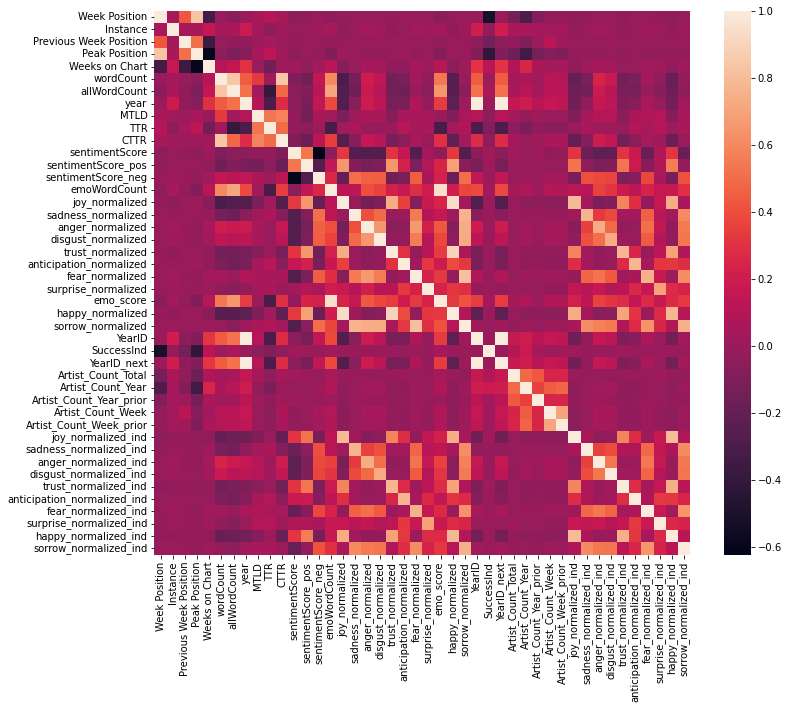

In [33]:
plt.subplots(figsize=(12,10))
sns.heatmap(df_emo_full.corr());

### 3b. PPS Predictor Analysis

PPS Predictor Analysis allows us to check for potential linear AND NON-LINEAR relationships between variables.

In [34]:
pps.predictors(df_emo_full, y = "SuccessInd")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Week Position,SuccessInd,1.000000,regression,True,mean absolute error,0.0996,0.000000,DecisionTreeRegressor()
1,Previous Week Position,SuccessInd,0.545172,regression,True,mean absolute error,0.0996,0.045301,DecisionTreeRegressor()
2,WeekID,SuccessInd,0.000000,regression,True,mean absolute error,0.0996,0.155140,DecisionTreeRegressor()
3,Song,SuccessInd,0.000000,regression,True,mean absolute error,0.0996,0.110640,DecisionTreeRegressor()
4,SongID,SuccessInd,0.000000,regression,True,mean absolute error,0.0996,0.105333,DecisionTreeRegressor()
5,Instance,SuccessInd,0.000000,regression,True,mean absolute error,0.0996,0.179049,DecisionTreeRegressor()
6,Peak Position,SuccessInd,0.000000,regression,True,mean absolute error,0.0996,0.101803,DecisionTreeRegressor()
7,Weeks on Chart,SuccessInd,0.000000,regression,True,mean absolute error,0.0996,0.169488,DecisionTreeRegressor()
8,Artist,SuccessInd,0.000000,regression,True,mean absolute error,0.0994,0.147838,DecisionTreeRegressor()
9,wordCount,SuccessInd,0.000000,regression,True,mean absolute error,0.0996,0.179383,DecisionTreeRegressor()


In [35]:
pps.predictors(df_emo_full, y = "Week Position")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Previous Week Position,Week Position,0.697120,regression,True,mean absolute error,24.9078,7.544077,DecisionTreeRegressor()
1,Peak Position,Week Position,0.563066,regression,True,mean absolute error,24.9078,10.883053,DecisionTreeRegressor()
2,SuccessInd,Week Position,0.178647,regression,True,mean absolute error,24.9078,20.458101,DecisionTreeRegressor()
3,Weeks on Chart,Week Position,0.170591,regression,True,mean absolute error,24.9078,20.658756,DecisionTreeRegressor()
4,Artist_Count_Year,Week Position,0.065553,regression,True,mean absolute error,24.5258,22.918064,DecisionTreeRegressor()
5,Artist_Count_Total,Week Position,0.004681,regression,True,mean absolute error,24.5258,24.411004,DecisionTreeRegressor()
6,Instance,Week Position,0.003980,regression,True,mean absolute error,24.9078,24.808670,DecisionTreeRegressor()
7,Artist_Count_Year_prior,Week Position,0.001473,regression,True,mean absolute error,23.9750,23.939688,DecisionTreeRegressor()
8,Artist_Count_Week_prior,Week Position,0.001154,regression,True,mean absolute error,24.0048,23.977102,DecisionTreeRegressor()
9,surprise_normalized_ind,Week Position,0.000784,regression,True,mean absolute error,24.9078,24.888285,DecisionTreeRegressor()


In [36]:
pps.predictors(df_emo_full, y = "Peak Position")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Previous Week Position,Peak Position,0.638250,regression,True,mean absolute error,25.5734,9.251166,DecisionTreeRegressor()
1,Week Position,Peak Position,0.550060,regression,True,mean absolute error,25.5734,11.506494,DecisionTreeRegressor()
2,Weeks on Chart,Peak Position,0.339242,regression,True,mean absolute error,25.5734,16.897834,DecisionTreeRegressor()
3,SuccessInd,Peak Position,0.133766,regression,True,mean absolute error,25.5734,22.152544,DecisionTreeRegressor()
4,Artist_Count_Year,Peak Position,0.095455,regression,True,mean absolute error,25.2626,22.851158,DecisionTreeRegressor()
5,Artist_Count_Total,Peak Position,0.035239,regression,True,mean absolute error,25.2626,24.372364,DecisionTreeRegressor()
6,Artist,Peak Position,0.020652,regression,True,mean absolute error,25.2626,24.740877,DecisionTreeRegressor()
7,Artist_Count_Week,Peak Position,0.011254,regression,True,mean absolute error,25.2626,24.978294,DecisionTreeRegressor()
8,Artist_Count_Week_prior,Peak Position,0.006998,regression,True,mean absolute error,23.3036,23.140521,DecisionTreeRegressor()
9,Instance,Peak Position,0.003587,regression,True,mean absolute error,25.5734,25.481659,DecisionTreeRegressor()


In [37]:
pps.predictors(df_emo_full, y = "Weeks on Chart")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Peak Position,Weeks on Chart,0.237930,regression,True,mean absolute error,5.4024,4.117006,DecisionTreeRegressor()
1,Previous Week Position,Weeks on Chart,0.145554,regression,True,mean absolute error,5.4024,4.616061,DecisionTreeRegressor()
2,Week Position,Weeks on Chart,0.031534,regression,True,mean absolute error,5.4024,5.232040,DecisionTreeRegressor()
3,DecadeID,Weeks on Chart,0.009313,regression,True,mean absolute error,5.4024,5.352085,DecisionTreeRegressor()
4,decade,Weeks on Chart,0.007149,regression,True,mean absolute error,5.4024,5.363780,DecisionTreeRegressor()
5,YearID,Weeks on Chart,0.002896,regression,True,mean absolute error,5.4024,5.386757,DecisionTreeRegressor()
6,YearID_next,Weeks on Chart,0.002896,regression,True,mean absolute error,5.4024,5.386757,DecisionTreeRegressor()
7,year,Weeks on Chart,0.001570,regression,True,mean absolute error,5.4024,5.393917,DecisionTreeRegressor()
8,WeekID,Weeks on Chart,0.000000,regression,True,mean absolute error,5.4024,6.521892,DecisionTreeRegressor()
9,Song,Weeks on Chart,0.000000,regression,True,mean absolute error,5.4024,7.553310,DecisionTreeRegressor()


In [38]:
# pps.matrix(df_emo_full)

## 4. Bivariate Analysis

From our correlation and pps analysis above, there are a few variables that peak our interest. 
Success indicator does not appear to be a best option for response. 

For Week Position: Previous Week Position, Peak Position, SuccessInd, Weeks on Chart, Artist Count Year, Artist Count Year Prior, Artist Count Week Prior, Artist Count Total, Instance, Surprise, Joy, Happy, Trust, Anticipation, Anger. 

For Peak Position: Previous Week Position, Week Position, Weeks on Chart, SuccessInd, Artist Count Year, Artist Count Total, Artist, Artist Count Week, Artist Count Week Prior, Instance, Artist Count Year Prior, DecadeID, decade

For Weeks on Chart: Peak Position, Previous Week Position, Week Position, DecadeID, decade, YearID, year

### 4a. Week Position Bivariate Analysis

#### Scatter plots for numeric variables

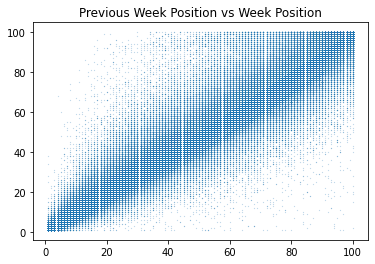

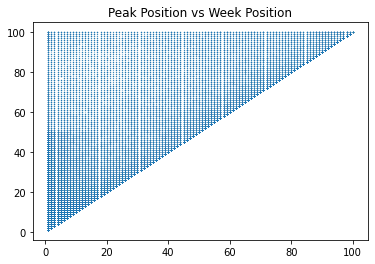

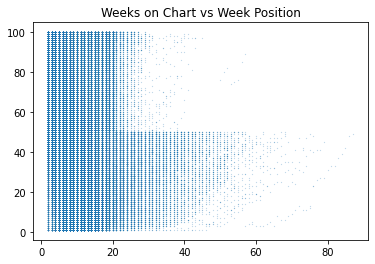

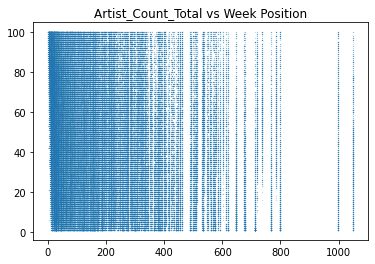

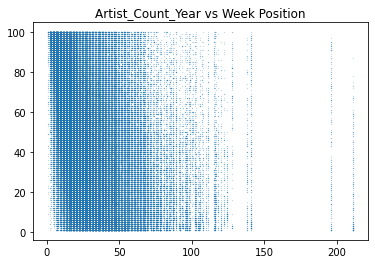

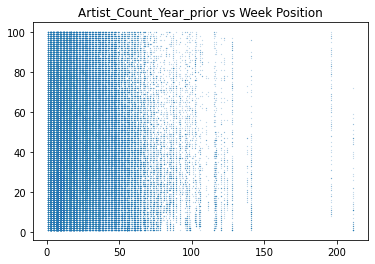

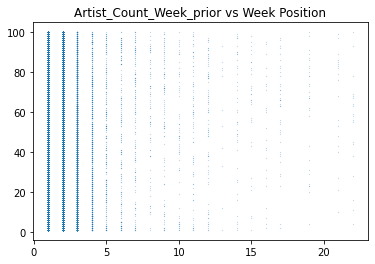

In [39]:
check = df_emo_full[df_emo_full['Previous Week Position'] != 999]
for i in ['Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Artist_Count_Total', 'Artist_Count_Year', 'Artist_Count_Year_prior', 'Artist_Count_Week_prior']:
    plt.scatter(check[i], check['Week Position'], s = .01)
    plt.title(i + ' vs Week Position')
    plt.show()

#### Violin plots for categorical variables

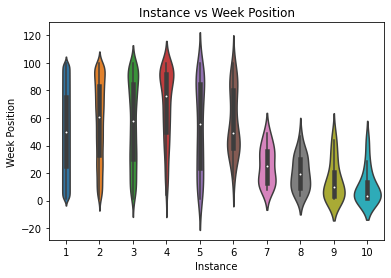

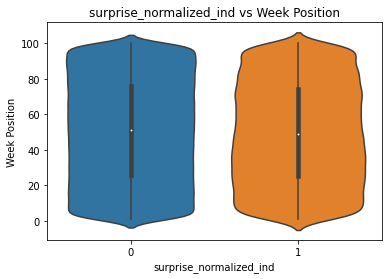

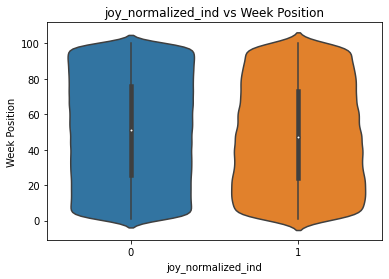

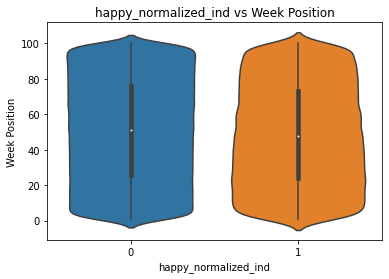

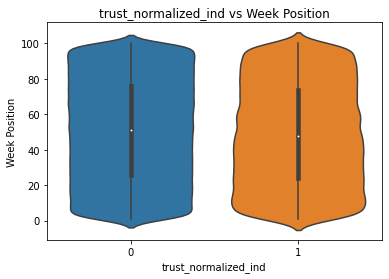

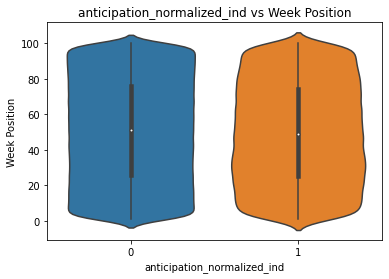

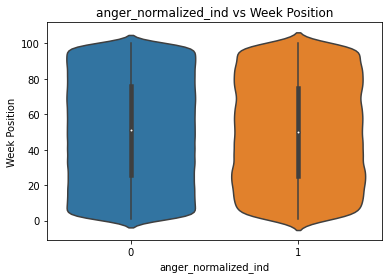

In [40]:
for i in ['Instance', 'surprise_normalized_ind', 'joy_normalized_ind', 'happy_normalized_ind', 'trust_normalized_ind', 'anticipation_normalized_ind', 'anger_normalized_ind']:
    sns.violinplot(data = df_emo_full, x = i , y = 'Week Position')
    plt.title(i + " vs Week Position")
    plt.show()

#### Histograms for categorical variables

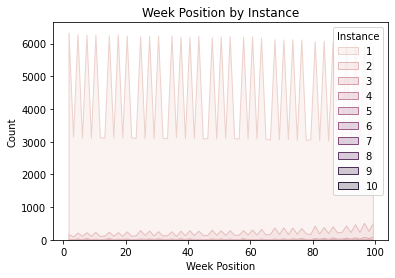

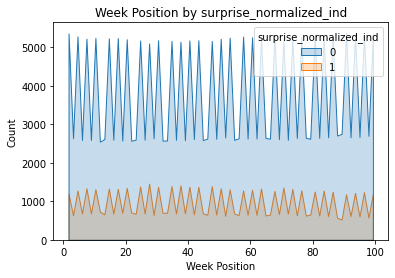

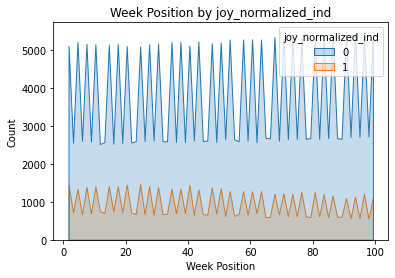

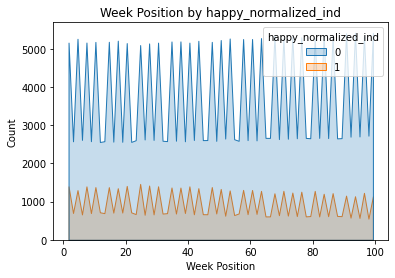

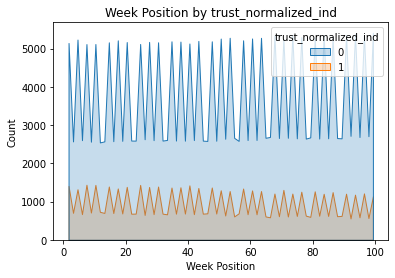

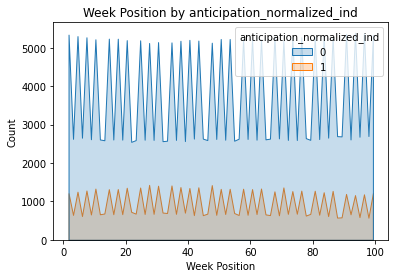

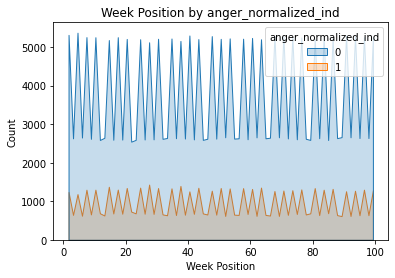

In [41]:
for i in ['Instance', 'surprise_normalized_ind', 'joy_normalized_ind', 'happy_normalized_ind', 'trust_normalized_ind', 'anticipation_normalized_ind', 'anger_normalized_ind']:
    sns.histplot(data = df_emo_full, x = 'Week Position' , hue = i, element="poly")
    plt.title("Week Position by " + i)
    plt.show()

### 4b. Peak Position Bivariate Analysis

#### Scatter plots for numeric variables

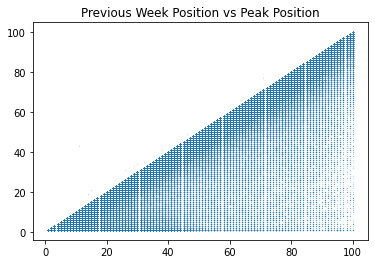

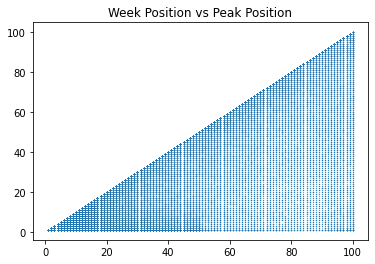

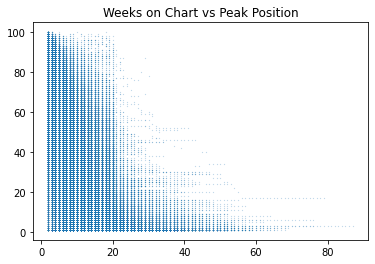

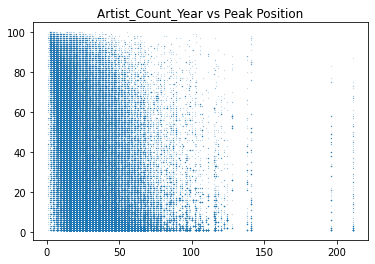

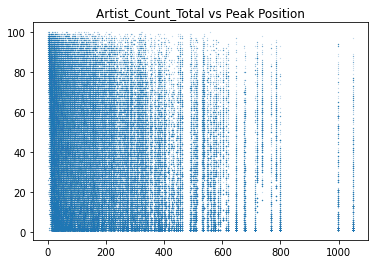

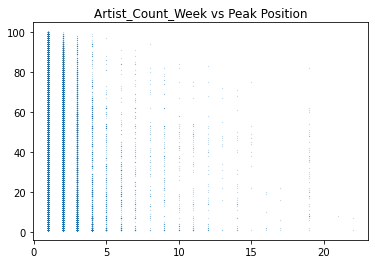

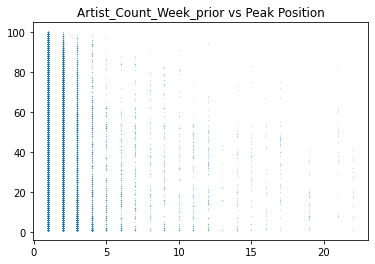

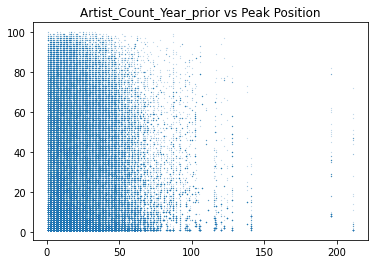

In [42]:
check = df_emo_full[df_emo_full['Previous Week Position'] != 999]
for i in ['Previous Week Position', 'Week Position', 'Weeks on Chart', 'Artist_Count_Year', 'Artist_Count_Total', 'Artist_Count_Week', 'Artist_Count_Week_prior', 'Artist_Count_Year_prior']:
    plt.scatter(check[i], check['Peak Position'], s = .01)
    plt.title(i + ' vs Peak Position')
    plt.show()

### 4c. Previous Week Position Bivariate Analysis

#### Scatter plots for numeric variables

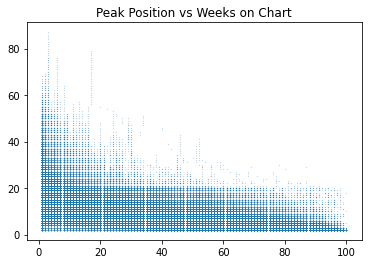

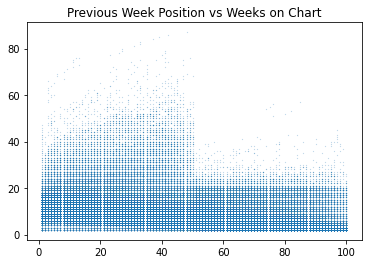

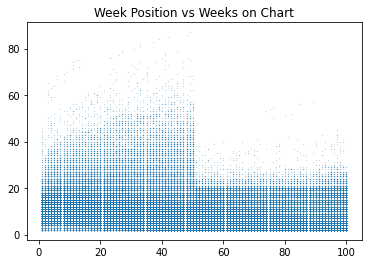

In [43]:
check = df_emo_full[df_emo_full['Previous Week Position'] != 999]
for i in ['Peak Position', 'Previous Week Position', 'Week Position']:
    plt.scatter(check[i], check['Weeks on Chart'], s = .01)
    plt.title(i + ' vs Weeks on Chart')
    plt.show()

### 4d. Additional Relationships of Interest

/Users/harrisonchaseweber/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


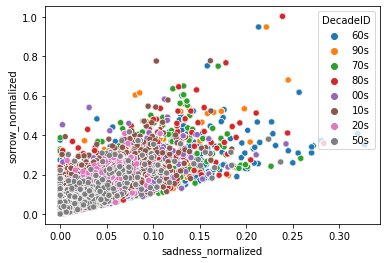

In [44]:
sns.scatterplot(data = df_emo_full, x = 'sadness_normalized', y = 'sorrow_normalized', hue = 'DecadeID')
plt.show()

Text(0.5, 1.0, 'Sadness score vs sorrow score')

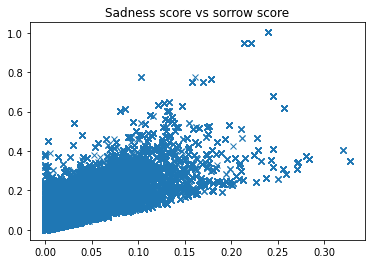

In [45]:
# Plot Sadness vs Sorrow

# Set x and y
x = df_emo_full['sadness_normalized']
y = df_emo_full['sorrow_normalized']

#create basic scatterplot
plt.plot(x, y, 'x')

plt.title("Sadness score vs sorrow score")

Text(0.5, 1.0, 'Anger score vs sorrow score')

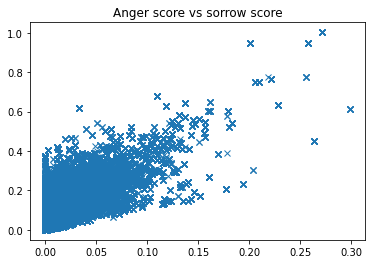

In [46]:
# Plot Anger vs Sorrow

# Set x and y
x = df_emo_full['anger_normalized']
y = df_emo_full['sorrow_normalized']

#create basic scatterplot
plt.plot(x, y, 'x')

plt.title("Anger score vs sorrow score")

Text(0.5, 1.0, 'Disgust score vs sorrow score')

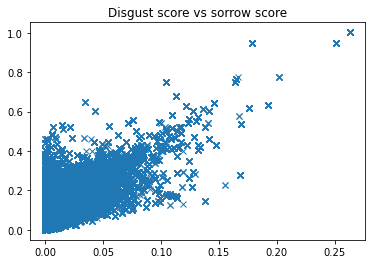

In [47]:
# Plot Disgust vs Sorrow

# Set x and y
x = df_emo_full['disgust_normalized']
y = df_emo_full['sorrow_normalized']

#create basic scatterplot
plt.plot(x, y, 'x')

plt.title("Disgust score vs sorrow score")

Text(0.5, 1.0, 'Happy score vs trust score')

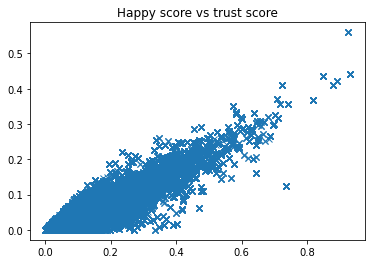

In [48]:
# Plot Happy vs Trust

# Set x and y
x = df_emo_full['happy_normalized']
y = df_emo_full['trust_normalized']

#create basic scatterplot
plt.plot(x, y, 'x')

plt.title("Happy score vs trust score")

Text(0.5, 1.0, 'Happy score vs joy score')

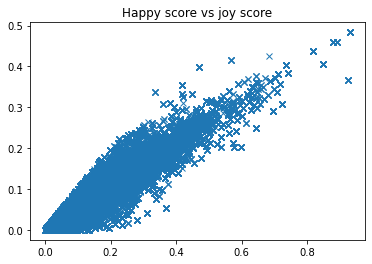

In [49]:
# Plot happy vs joy

# Set x and y
x = df_emo_full['happy_normalized']
y = df_emo_full['joy_normalized']

#create basic scatterplot
plt.plot(x, y, 'x')

plt.title("Happy score vs joy score")

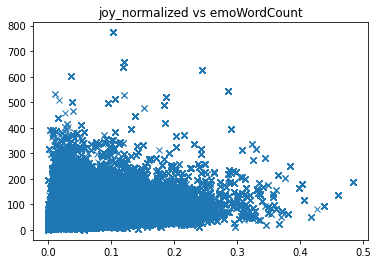

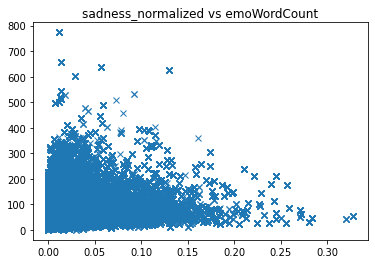

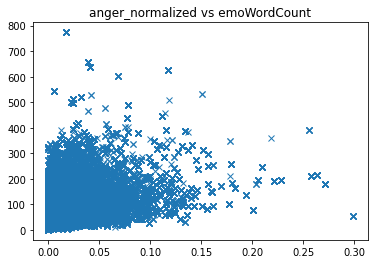

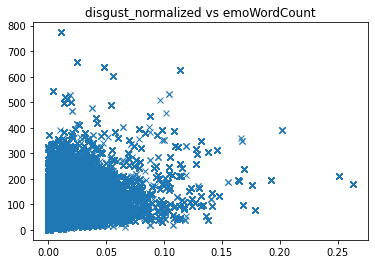

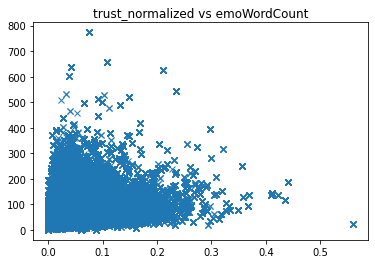

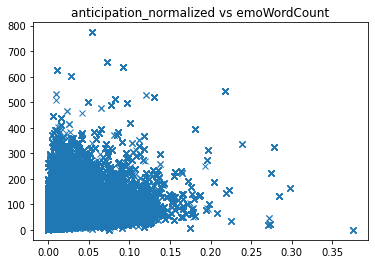

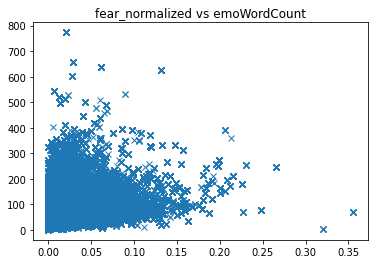

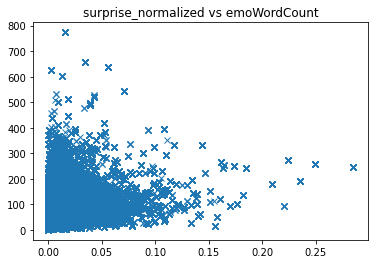

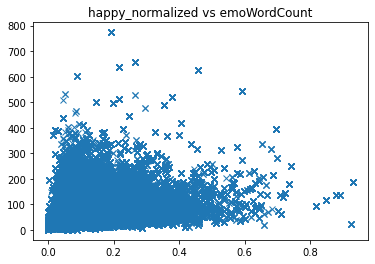

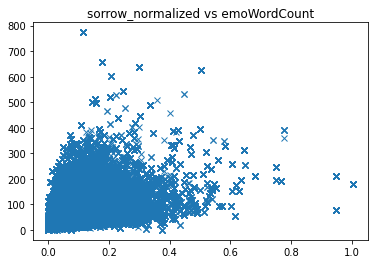

In [50]:
for i in ['joy_normalized', 'sadness_normalized', 'anger_normalized', 'disgust_normalized', 'trust_normalized', 'anticipation_normalized', 'fear_normalized', 'surprise_normalized', 'happy_normalized', 'sorrow_normalized']:
    plt.plot(df_emo_full[i], df_emo_full['emoWordCount'], 'x')
    plt.title(i + ' vs emoWordCount')
    plt.show()

## 5. Export Data

In [51]:
df_emo_full_eda = df_emo_full

In [52]:
df_emo_full_eda.to_csv(r'/Users/harrisonchaseweber/Desktop/Springboard/Billboard Top 10 Prediction/DataFiles/df_emo_full_eda.csv')

## 6. Summary

Initially, we were hoping to use "SuccessInd" as our response variable. This indicator flags any song in the top 10 as a success, otherwise not a success. Based on our EDA, there does not appear to be significant relationships between potential explanitory variables and this indicator. We do find some relationship between potential explanitory variables and "Week Position". We also find some relationship for "Peak Position".

In addition to exploring new response variables, we create a few variables from our original data. In this code we created:
"Artist_Count_Total" : provides the total number of times an artist appears on the Billboard Top 100.
"Artist_Count_Year" : which provides the total number of songs an artist appears on the Billboard Top 100 that year.
"Artist_Count_Year_prior" : provides the total number of songs from the year prior.
"Artist_Count_Week" : which provides the total number of songs an artist appears on the Billboard Top 100 that week.
"Artist_Count_Week_prior" : provides the total number of songs from the week prior.
We also create emotion indicators, if a song scores over the 80th percentile in a given emotion score, it is considered significant to that emotion, otherwise it is not. 